# Exercises Lesson 2

Name: Carlos Cocha

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import pandas as pd

### Exercise 2.1: Plot the monthly and annual difference between max and min temperatures as a function of the month (1-12) and the year (1961-2096), respectively.

In [2]:
metdata_orig = np.loadtxt(fname='/home/nucphys/Downloads/ISP/Python/TData/T_Alicante_EM.csv', delimiter=',', skiprows=1)
metdata = metdata_orig[:,1:]
years=metdata_orig[:,0]
months = ['Jan','F','M','A','My','Jn','Jl','Ag','S','O','N','Dec']

Text(0, 0.5, 'Diff. T (ºC)')

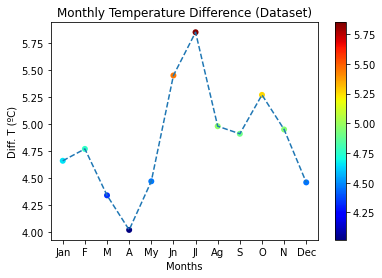

In [4]:
min_monthly = np.min(metdata, axis=0)
max_monthly = np.max(metdata, axis=0)
fig, ax = plt.subplots()
ax.plot(months,max_monthly-min_monthly, '--')
df=pd.DataFrame(data={'A':months,'B':max_monthly-min_monthly,'C':max_monthly-min_monthly})
points=ax.scatter(df.A, df.B, c=df.C,cmap="jet", lw=0)
plt.colorbar(points)
ax.set_title("Monthly Temperature Difference (Dataset)")
ax.set_xlabel("Months")
ax.set_ylabel('Diff. T (ºC)')


Text(0, 0.5, 'Diff. T (ºC)')

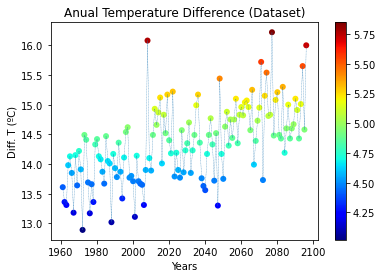

In [5]:
min_year = np.min(metdata, axis=1)
max_year = np.max(metdata, axis=1)
fig, ax = plt.subplots()
ax.plot(years,max_year-min_year,'--',linewidth=0.3)
df=pd.DataFrame(data={'A':years,'B':max_year-min_year,'C':max_year-min_year})
ax.scatter(df.A, df.B, c=df.C,cmap="jet", lw=0)
plt.colorbar(points)
ax.set_title("Anual Temperature Difference (Dataset)")
ax.set_xlabel("Years")
ax.set_ylabel('Diff. T (ºC)')


### Exercise 2.2: Plot the standard deviation of the monthly and annual temperatures as a function of the month (1-12) and the year (1961-2096), respectively.

Text(0, 0.5, 'Std. T (ºC)')

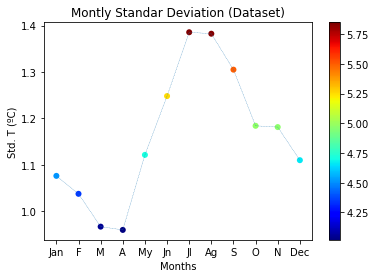

In [6]:
std_monthly = np.std(metdata, axis=0)
fig, ax = plt.subplots()
ax.plot(months,std_monthly, '--', linewidth=0.3)
df=pd.DataFrame(data={'A':months,'B':std_monthly,'C':std_monthly})
ax.scatter(df.A, df.B, c=df.C,cmap="jet", lw=0)
plt.colorbar(points)
ax.set_title("Montly Standar Deviation (Dataset)")
ax.set_xlabel("Months")
ax.set_ylabel('Std. T (ºC)')


Text(0, 0.5, 'Std. T (ºC)')

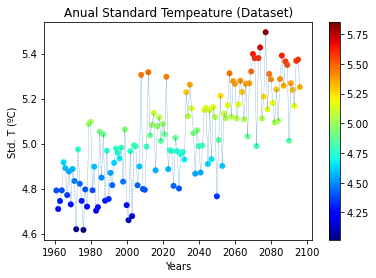

In [7]:
std_year = np.std(metdata, axis=1)
fig, ax = plt.subplots()
ax.plot(years, std_year, '--', linewidth=0.3)
#std_year_plot2 = plt.scatter(years, std_year)
df=pd.DataFrame(data={'A':years,'B':std_year,'C':std_year})
ax.scatter(df.A, df.B, c=df.C,cmap="jet", lw=0)
plt.colorbar(points)
ax.set_title("Anual Standard Tempeature (Dataset)")
ax.set_xlabel("Years")
ax.set_ylabel('Std. T (ºC)')



### Exercise 2.3: Prepare a plot with six panels (arranged as you wish) which depicts the annual dependence of the average monthly temperature for meteorological Spring (Mar, Apr, May) and Fall (Sep, Nov, Dec) seasons.

In [8]:
mar_temp = metdata[:,2]
apr_temp = metdata[:,3]
may_temp = metdata[:,4]
sep_temp = metdata[:,8]
nov_temp = metdata[:,10]
dec_temp = metdata[:,11]
spring_temp=(mar_temp + apr_temp + may_temp)/3
fall_temp= (sep_temp + nov_temp + dec_temp)/3
max_T=max(fall_temp)
min_T=min(spring_temp)

In [9]:
indices=[10,20,30, 40,50, 100]
a=np.split(years,indices)
fall_split=np.split(fall_temp, indices)
spring_split=np.split(spring_temp, indices)
years_split=np.split(years, indices)


Text(20.625, 0.5, 'Season T (ºC)')

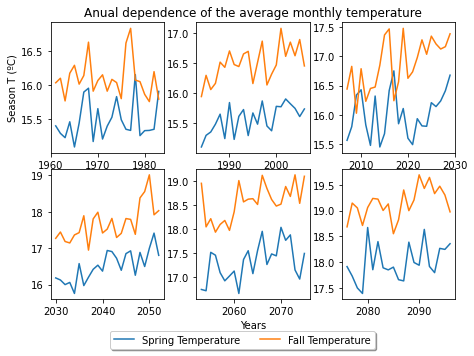

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=3)
fig.tight_layout(pad=-0.5)
ax[0,0].plot(years[0:23], spring_temp[0:23])
ax[0,1].plot(years[23:46],spring_temp[23:46])
ax[0,2].plot(years[46:69],spring_temp[46:69])
ax[1,0].plot(years[69:92],spring_temp[69:92])
ax[1,1].plot(years[92:115],spring_temp[92:115], label='Spring Temperature')
ax[1,2].plot(years[115:],spring_temp[115:])
ax[0,0].plot(years[0:23],fall_temp[0:23])
ax[0,1].plot(years[23:46],fall_temp[23:46])
ax[0,2].plot(years[46:69],fall_temp[46:69])
ax[1,0].plot(years[69:92],fall_temp[69:92])
ax[1,1].plot(years[92:115],fall_temp[92:115],label='Fall Temperature')
ax[1,2].plot(years[115:],fall_temp[115:])
fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2)
ax[0,1].set_title("Anual dependence of the average monthly temperature")
ax[1,1].set_xlabel("Years")
ax[0,0].set_ylabel('Season T (ºC)')


Text(0, 0.5, 'Season T (ºC)')

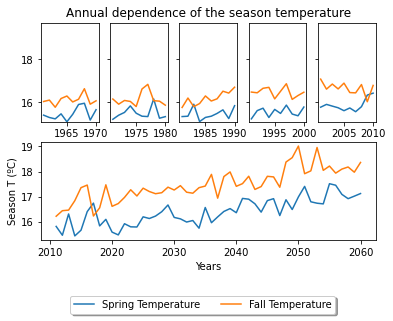

In [11]:
fig=plt.figure()
gs=GridSpec(2,5) # 2 rows, 3 columns
ax1=fig.add_subplot(gs[0,0])
ax1.plot(years_split[0], spring_split[0], label='Spring Temperature')
ax1.plot(years_split[0],fall_split[0], label='Fall Temperature')
ax1.set_ylim([min_T,max_T])
ax2=fig.add_subplot(gs[0,1])
ax2.plot(years_split[1],spring_split[1])
ax2.plot(years_split[1],fall_split[1])
ax2.set_ylim([min_T,max_T])
ax2.set_yticklabels([])

ax3=fig.add_subplot(gs[0,2])
ax3.plot(years_split[2],spring_split[2])
ax3.plot(years_split[2],fall_split[2])
ax3.set_ylim([min_T,max_T])
ax3.set_yticklabels([])
ax4=fig.add_subplot(gs[0,3])
ax4.plot(years_split[3],spring_split[3])
ax4.plot(years_split[3],fall_split[3])
ax4.set_ylim([min_T,max_T])
ax4.set_yticklabels([])
ax5=fig.add_subplot(gs[0,4])
ax5.plot(years_split[4],spring_split[4])
ax5.plot(years_split[4],fall_split[4])
ax5.set_ylim([min_T,max_T])
ax5.set_yticklabels([])
ax6=fig.add_subplot(gs[1,:])
ax6.plot(years_split[5],spring_split[5])
ax6.plot(years_split[5],fall_split[5])
fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2)


ax3.set_title("Annual dependence of the season temperature")
ax6.set_xlabel("Years")
ax6.set_ylabel('Season T (ºC)')

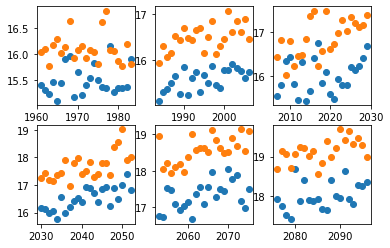

In [12]:
fig = plt.figure()
fig.add_subplot(231)
plt.scatter(years[0:23], spring_temp[0:23])
plt.scatter(years[0:23], fall_temp[0:23])
fig.add_subplot(232)
plt.scatter(years[23:46],spring_temp[23:46])
plt.scatter(years[23:46],fall_temp[23:46])
fig.add_subplot(233)
plt.scatter(years[46:69],spring_temp[46:69])
plt.scatter(years[46:69],fall_temp[46:69])
fig.add_subplot(234)
plt.scatter(years[69:92],spring_temp[69:92])
plt.scatter(years[69:92],fall_temp[69:92])
fig.add_subplot(235)
plt.scatter(years[92:115],spring_temp[92:115])
plt.scatter(years[92:115],fall_temp[92:115])
fig.add_subplot(236)
plt.scatter(years[115:],spring_temp[115:])
plt.scatter(years[115:],fall_temp[115:])